In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np


#Tweaks to the libraries
#Shows all the columns in the dataframe
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('train.csv')
print(df.shape)

(116892, 24)


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116892 entries, 0 to 116891
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Id                                 116892 non-null  int64  
 1   satisfaction                       116892 non-null  object 
 2   Gender                             116892 non-null  object 
 3   Customer Type                      116892 non-null  object 
 4   Age                                116892 non-null  int64  
 5   Type of Travel                     116892 non-null  object 
 6   Class                              116892 non-null  object 
 7   Flight Distance                    116892 non-null  int64  
 8   Seat comfort                       116892 non-null  int64  
 9   Departure/Arrival time convenient  116892 non-null  int64  
 10  Food and drink                     116892 non-null  int64  
 11  Gate location                      1168

In [5]:
print(df.isnull().sum())

Id                                     0
satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             351
dtype: int64


In [6]:
df.head(10)

,Id,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,86347,satisfied,Male,Loyal Customer,50,Business travel,Business,1548,5,5,5,5,4,5,5,3,3,3,3,5,3,4,0,0.0
1,115822,satisfied,Male,Loyal Customer,51,Business travel,Business,4020,5,5,5,5,4,4,4,5,5,5,5,5,5,5,53,51.0
2,16351,dissatisfied,Male,Loyal Customer,14,Personal Travel,Eco,2328,2,5,1,4,1,1,1,1,5,3,3,4,4,1,0,4.0
3,107284,satisfied,Female,Loyal Customer,52,Business travel,Business,3761,2,2,2,2,3,4,5,4,4,4,4,4,4,5,61,55.0
4,5788,dissatisfied,Female,Loyal Customer,26,Personal Travel,Eco,3348,1,5,0,3,0,5,5,5,3,4,3,5,1,5,196,169.0
5,104359,satisfied,Female,Loyal Customer,54,Business travel,Business,3862,4,4,3,4,2,4,4,4,4,4,4,3,4,3,0,29.0
6,60650,dissatisfied,Female,disloyal Customer,65,Business travel,Business,1387,4,4,4,5,1,4,1,1,4,5,4,4,5,1,24,27.0
7,87250,dissatisfied,Male,Loyal Customer,44,Business travel,Business,2348,1,4,4,4,3,3,3,4,4,4,1,3,4,1,0,14.0
8,120745,satisfied,Female,Loyal Customer,70,Business travel,Business,1588,4,4,4,4,3,5,4,5,5,5,5,4,5,5,0,0.0
9,85963,dissatisfied,Female,Loyal Customer,35,Business travel,Business,2648,3,4,2,2,2,3,4,3,3,3,3,1,3,2,6,24.0


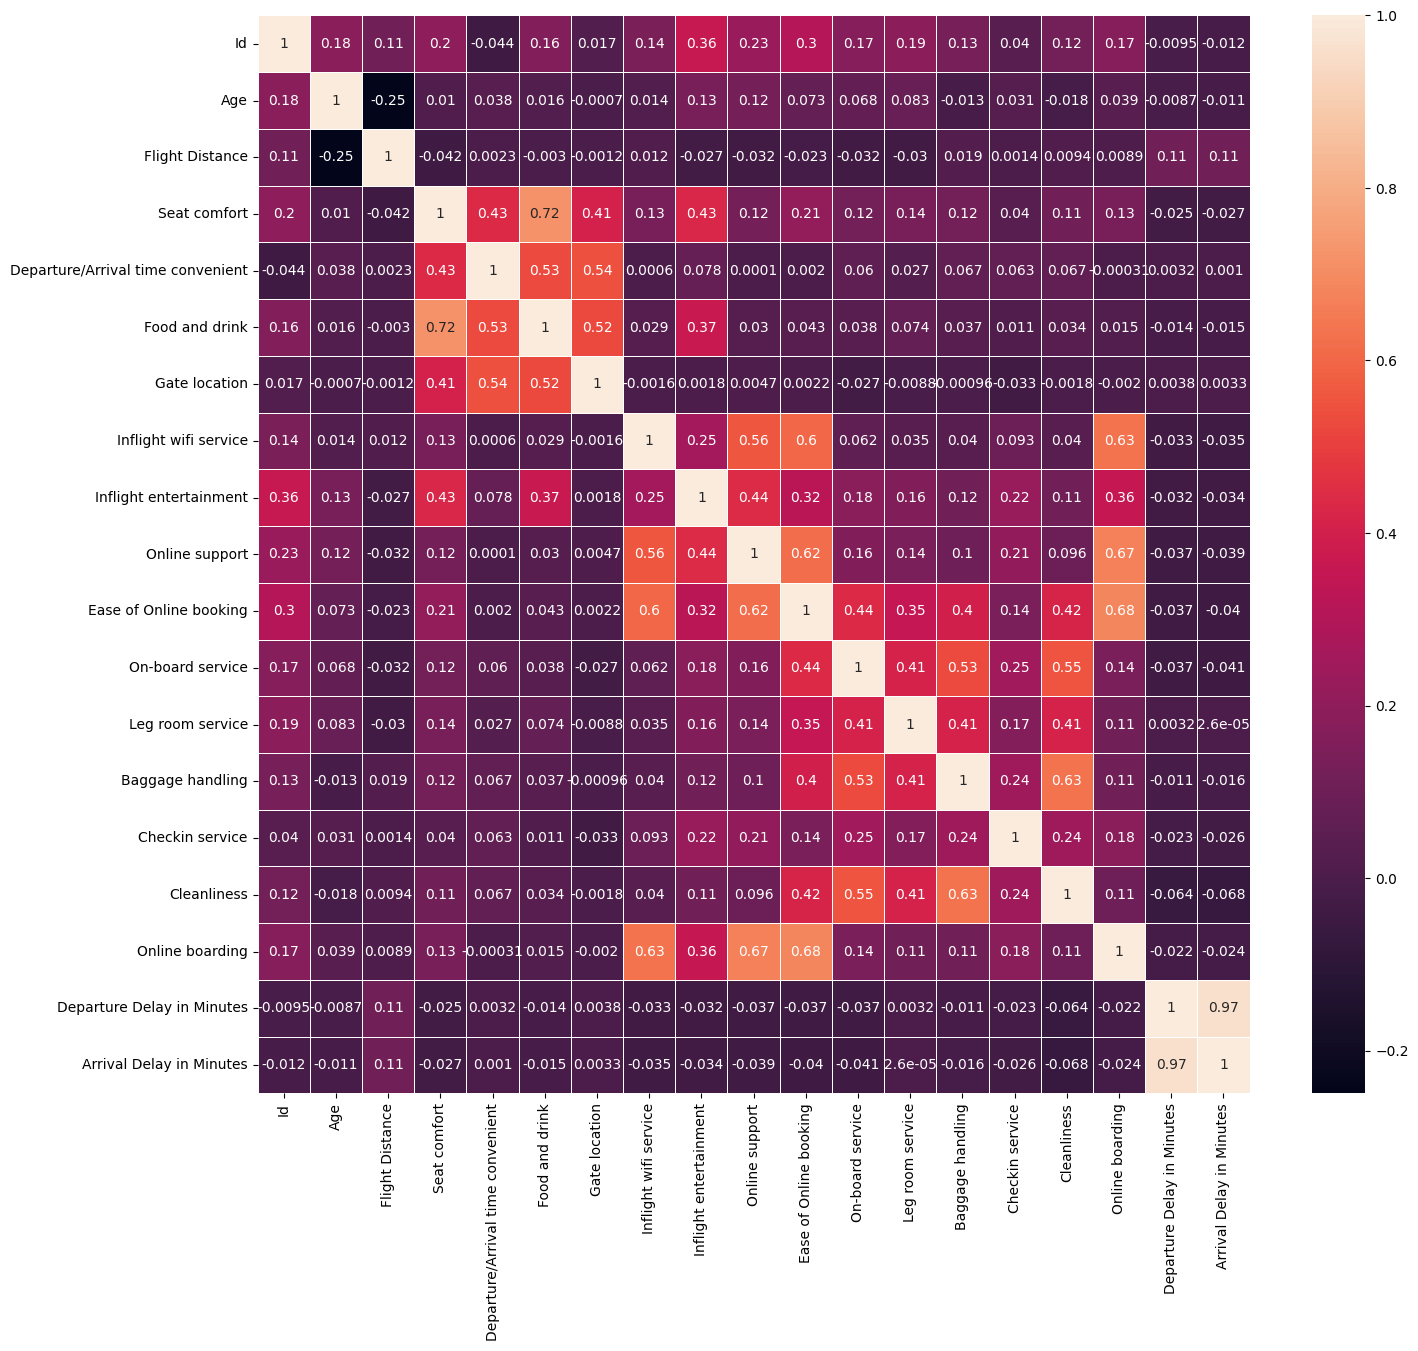

In [7]:
# Select only integer and float columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, linewidths=.5)
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame
# Identify object columns
object_columns = df.select_dtypes(include=['object']).columns

# Apply Label Encoding to each object column
label_encoders = {}
for col in object_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Now df has object columns converted to numerical values using Label Encoding
df.head(10)

,Id,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,86347,1,1,0,50,0,0,1548,5,5,5,5,4,5,5,3,3,3,3,5,3,4,0,0.0
1,115822,1,1,0,51,0,0,4020,5,5,5,5,4,4,4,5,5,5,5,5,5,5,53,51.0
2,16351,0,1,0,14,1,1,2328,2,5,1,4,1,1,1,1,5,3,3,4,4,1,0,4.0
3,107284,1,0,0,52,0,0,3761,2,2,2,2,3,4,5,4,4,4,4,4,4,5,61,55.0
4,5788,0,0,0,26,1,1,3348,1,5,0,3,0,5,5,5,3,4,3,5,1,5,196,169.0
5,104359,1,0,0,54,0,0,3862,4,4,3,4,2,4,4,4,4,4,4,3,4,3,0,29.0
6,60650,0,0,1,65,0,0,1387,4,4,4,5,1,4,1,1,4,5,4,4,5,1,24,27.0
7,87250,0,1,0,44,0,0,2348,1,4,4,4,3,3,3,4,4,4,1,3,4,1,0,14.0
8,120745,1,0,0,70,0,0,1588,4,4,4,4,3,5,4,5,5,5,5,4,5,5,0,0.0
9,85963,0,0,0,35,0,0,2648,3,4,2,2,2,3,4,3,3,3,3,1,3,2,6,24.0


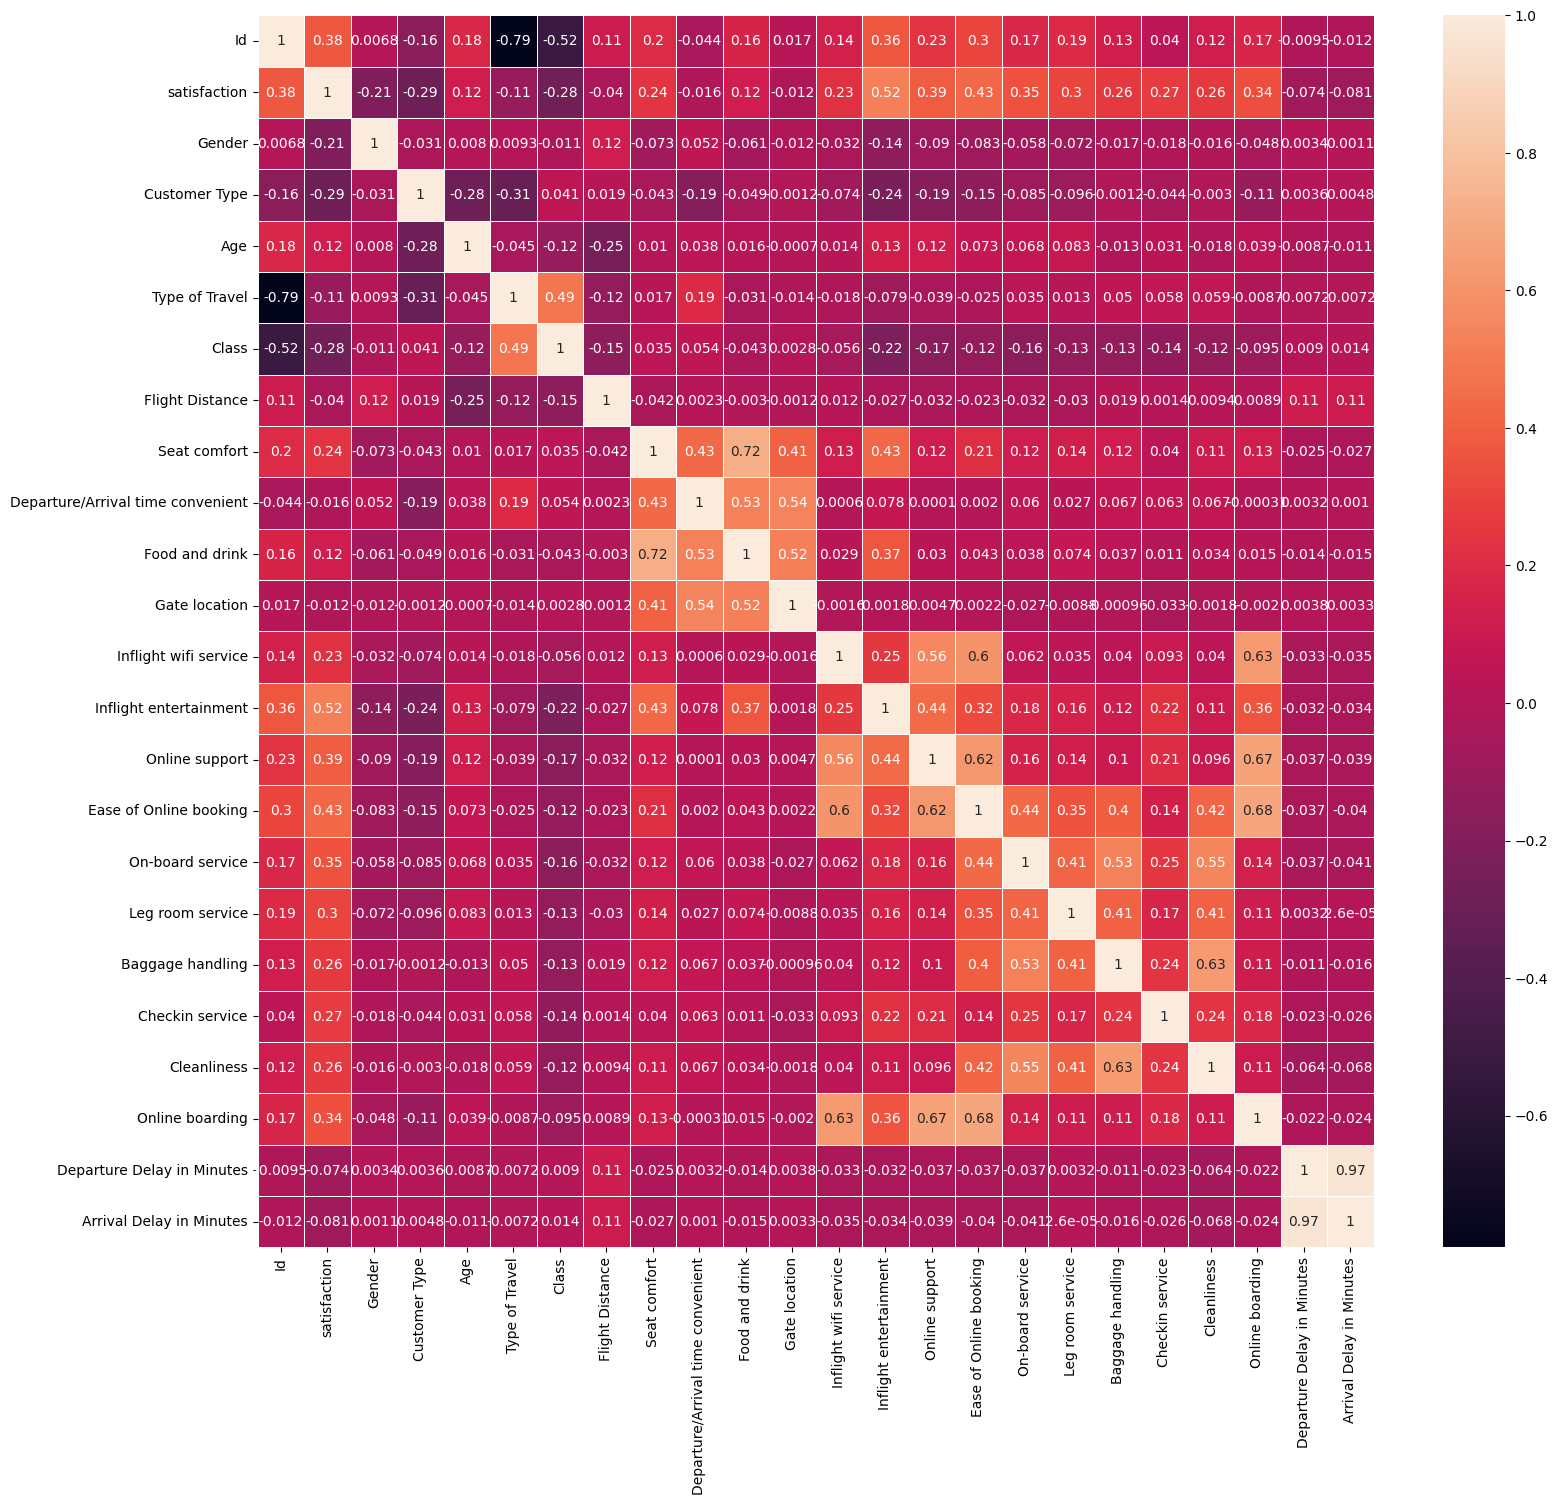

In [9]:
# Select only integer and float columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, annot=True, linewidths=.5)
plt.show()

In [10]:
df.dropna(axis=0, inplace=True)
df.head()

,Id,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,86347,1,1,0,50,0,0,1548,5,5,5,5,4,5,5,3,3,3,3,5,3,4,0,0.0
1,115822,1,1,0,51,0,0,4020,5,5,5,5,4,4,4,5,5,5,5,5,5,5,53,51.0
2,16351,0,1,0,14,1,1,2328,2,5,1,4,1,1,1,1,5,3,3,4,4,1,0,4.0
3,107284,1,0,0,52,0,0,3761,2,2,2,2,3,4,5,4,4,4,4,4,4,5,61,55.0
4,5788,0,0,0,26,1,1,3348,1,5,0,3,0,5,5,5,3,4,3,5,1,5,196,169.0


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Assuming df is your DataFrame
# Drop unnecessary columns
df = df.drop(columns=['Id', 'Departure Delay in Minutes'])

# Split the data into features and target
X = df.drop(columns=['satisfaction'])
y = df['satisfaction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42))
]

# Define stacking classifier
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression()
)

# Train the stacking classifier
stacking_clf.fit(X_train, y_train)

# Make predictions
y_pred = stacking_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.96


In [23]:
# Load the test data
test_df = pd.read_csv('test.csv')

test_df.info()

# Assuming df is your DataFrame
# Identify object columns
object_columns = test_df.select_dtypes(include=['object']).columns

# Apply Label Encoding to each object column
label_encoders = {}
for col in object_columns:
    le = LabelEncoder()
    test_df[col] = le.fit_transform(test_df[col])
    label_encoders[col] = le

# Store the "Id" column
id_column = test_df['Id']

# Preprocess the test data: Drop unnecessary columns
test_df = test_df.drop(columns=['Id', 'Departure Delay in Minutes'])

# Ensure the test data has the same features as the training data
X_test_new = test_df.drop(columns=['satisfaction'], errors='ignore')

# Make predictions using the trained stacking classifier
test_predictions = stacking_clf.predict(X_test_new)

# If you want to add the predictions to the test DataFrame
test_df['satisfaction'] = test_predictions

# Create a DataFrame with the predictions
predictions_df = pd.DataFrame({
    'Id': id_column,
    'satisfaction': test_predictions,
})

# Assuming df is your DataFrame
# Define the mapping dictionary
satisfaction_mapping = {
    0: 'dissatisfied',
    1: 'satisfied'
}

# Apply the mapping to the "satisfaction" column
predictions_df['satisfaction'] = predictions_df['satisfaction'].map(satisfaction_mapping)

# Save the predictions to a new CSV file if needed
predictions_df.to_csv('test_predictions.csv', index=False)


# Print the first few rows of the DataFrame with predictions
predictions_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12949 entries, 0 to 12948
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Id                                 12949 non-null  int64 
 1   Gender                             12949 non-null  object
 2   Customer Type                      12949 non-null  object
 3   Age                                12949 non-null  int64 
 4   Type of Travel                     12949 non-null  object
 5   Class                              12949 non-null  object
 6   Flight Distance                    12949 non-null  int64 
 7   Seat comfort                       12949 non-null  int64 
 8   Departure/Arrival time convenient  12949 non-null  int64 
 9   Food and drink                     12949 non-null  int64 
 10  Gate location                      12949 non-null  int64 
 11  Inflight wifi service              12949 non-null  int64 
 12  Infl

,Id,satisfaction
0,46587,dissatisfied
1,124920,satisfied
2,18490,satisfied
3,78644,dissatisfied
4,92713,satisfied
